# Encoding face features

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from faceparsing.parser import FaceParser
from automakeup import dlib_predictor_path
from automakeup.face import extract as face_extraction, bounding
from automakeup.feature import extract as feature_extraction
from imagine.color.conversion import BgrToRgb
from importlib import resources
from mtcnn import MTCNN
from facenet import Facenet

In [2]:
mtcnn = MTCNN()
bb_finder = bounding.MTCNNBoundingBoxFinder(mtcnn)

In [3]:
parser = FaceParser()

# Before makeup

In [4]:
img_path = "faces/face1.jpg"

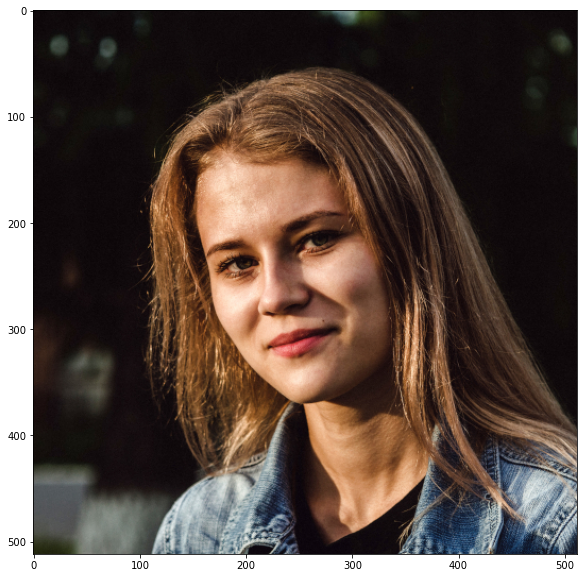

In [5]:
image = BgrToRgb(cv2.imread(img_path))
plt.figure(figsize=(10,10))
plt.imshow(image)

### Color encoding

In [6]:
face_extractor = face_extraction.SimpleFaceExtractor(512)

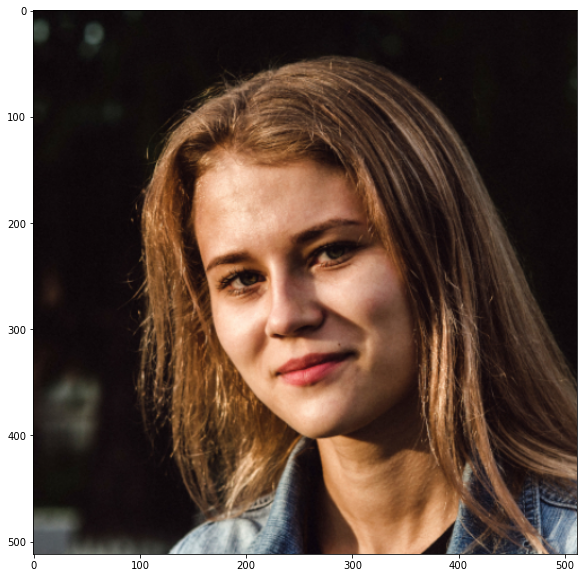

In [7]:
bb = bb_finder.find(image)
face = face_extractor.extract(image, bb)
plt.figure(figsize=(10,10))
plt.imshow(face)

In [8]:
feature_extractor = feature_extraction.ColorsFeatureExtractor(parser)

In [9]:
features = feature_extractor(face)
features

array([195, 138, 106,  80,  53,  37, 154,  62,  55,  57,  37,  27],
      dtype=uint8)

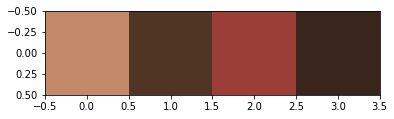

In [10]:
plt.imshow(features.reshape(1, -1, 3))

### Facenet encoding

In [11]:
with dlib_predictor_path() as p:
    predictor = dlib.shape_predictor(str(p))

In [12]:
face_extractor = face_extraction.AligningDlibFaceExtractor(512, predictor)

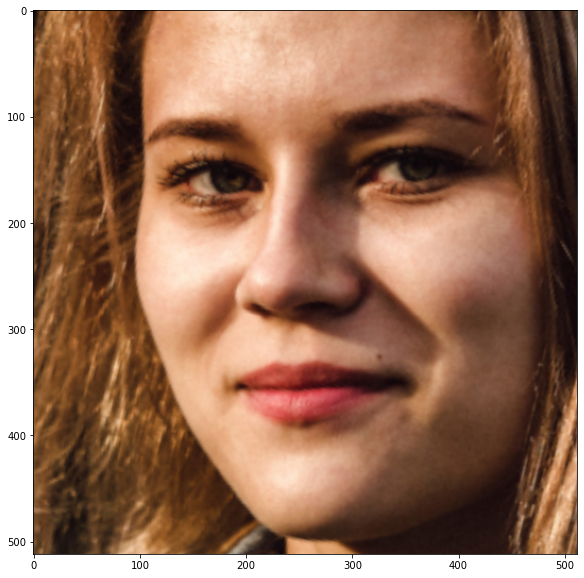

In [13]:
bb = bb_finder.find(image)
face = face_extractor.extract(image, bb)
plt.figure(figsize=(10,10))
plt.imshow(face)

In [14]:
facenet = Facenet()
feature_extractor = feature_extraction.FacenetFeatureExtractor(facenet)

In [15]:
features = feature_extractor(face)
features

array([-5.24055883e-02, -2.47073844e-02, -7.65398741e-02, -1.06552057e-02,
        6.89874440e-02, -1.36695048e-02,  9.41798184e-03,  2.80875377e-02,
        5.10483533e-02, -3.59959118e-02, -4.12089266e-02,  7.32945204e-02,
        2.04919502e-02, -5.22576049e-02,  2.38127541e-02,  1.55307017e-02,
        5.37665375e-02,  2.79512424e-02,  1.68222319e-02, -7.60167241e-02,
       -4.20499258e-02, -1.78462807e-02,  1.07169367e-01, -4.96066594e-03,
       -1.07669190e-03, -1.54069597e-02, -5.44986804e-04, -8.07493553e-02,
       -2.90725306e-02,  7.68276602e-02, -2.80436296e-02, -3.23131122e-02,
       -5.45941740e-02, -5.10330386e-02, -2.69411169e-02,  5.49094053e-03,
        3.29947956e-02, -2.63726395e-02, -1.13451943e-01,  8.28258693e-02,
        2.81558535e-03,  1.01967296e-02, -5.22107892e-02,  6.70753419e-02,
        9.44124348e-03,  6.78697194e-04,  4.94291000e-02,  7.65340254e-02,
       -1.23165376e-01, -3.80667187e-02, -5.30858375e-02,  3.38409692e-02,
        2.15327758e-02,  

# After makeup

In [16]:
img_path = "makeup/makeup1.jpg"

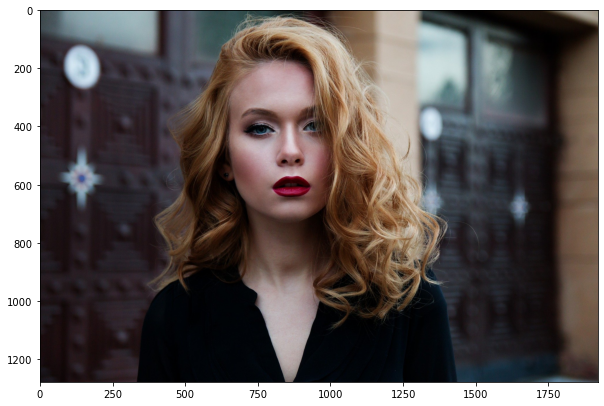

In [17]:
image = BgrToRgb(cv2.imread(img_path))
plt.figure(figsize=(10,10))
plt.imshow(image)

### Makeup encoding

In [18]:
face_extractor = face_extraction.SimpleFaceExtractor(512, bb_scale=1.0)

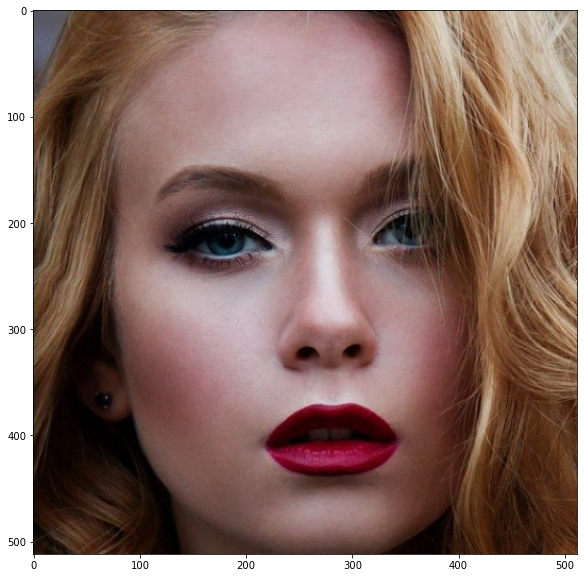

In [19]:
bb = bb_finder.find(image)
face = face_extractor.extract(image, bb)
plt.figure(figsize=(10,10))
plt.imshow(face)

In [20]:
feature_extractor = feature_extraction.MakeupExtractor(parser)

In [21]:
features = feature_extractor(face)
features

array([ 92,   7,  25,  81,  52,  51, 113,  85,  90, 177, 160, 164],
      dtype=uint8)

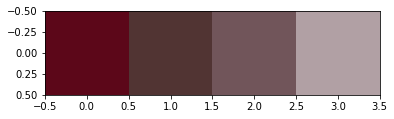

In [22]:
plt.imshow(features.reshape(1, -1, 3))